In [2]:
! pip install matplotlib

  Using cached matplotlib-3.10.5-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.1-cp310-cp310-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.5-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.1-cp310-cp310-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- --

--- Inspecting Case 1 ---
Files in npz: ['image', 'mask', 'label', 'pixel_spacing', 'ac_reference', 'uuid']
Image shape: (840, 562, 744)
Mask shape: (840, 562, 744)
Label shape: (840,)
Pixel spacing: 0.28
Ground-truth AC (mm): 312.27002
--------------------
--- Inspecting Case 2 ---
Files in npz: ['image', 'mask', 'label', 'pixel_spacing', 'ac_reference', 'uuid']
Image shape: (840, 562, 744)
Mask shape: (840, 562, 744)
Label shape: (840,)
Pixel spacing: 0.28
Ground-truth AC (mm): 257.17072
--------------------
Frames with any annotation: 22 / 840
Optimal frames: 5
Suboptimal frames: 17
Unique masks [0 1 2]


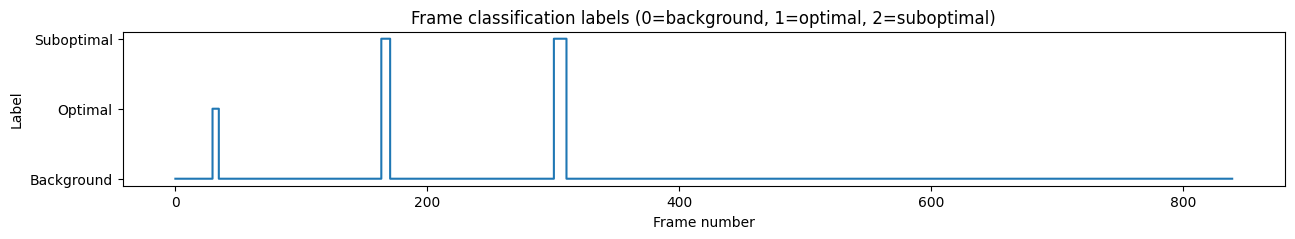

Visualizing the first 20 annotated frames out of 22...


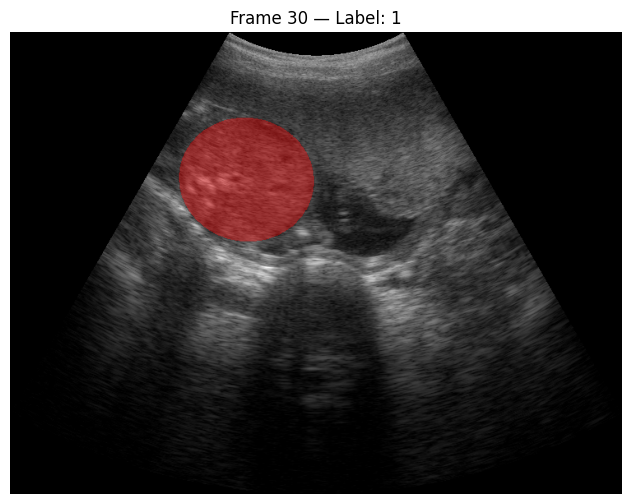

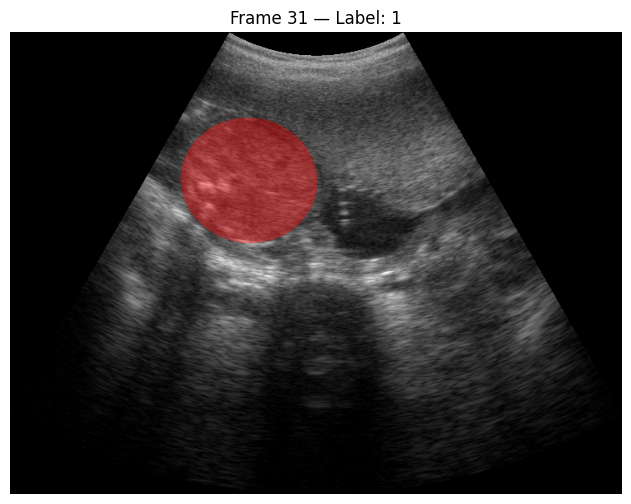

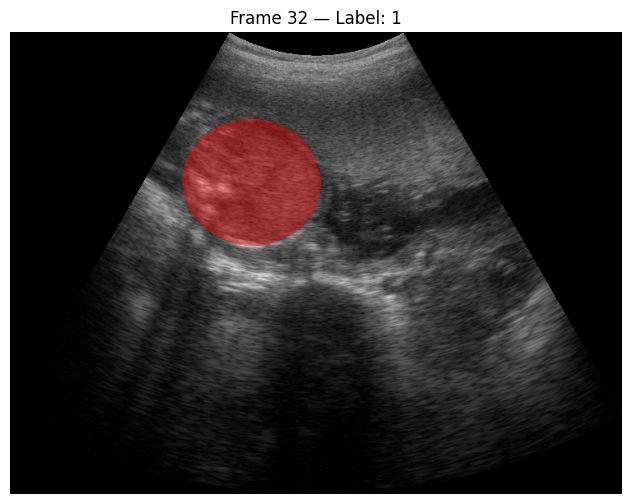

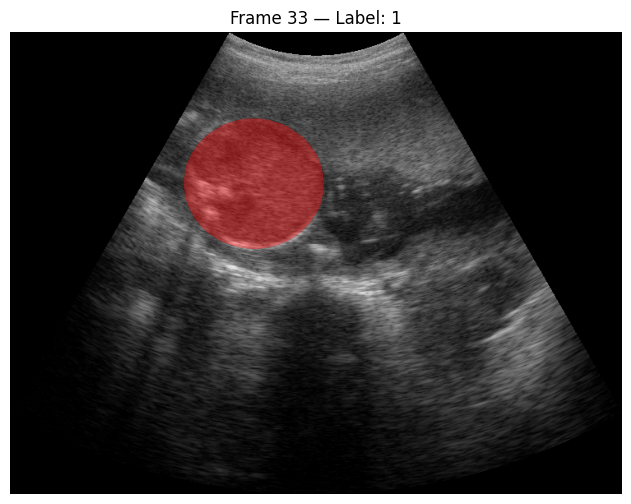

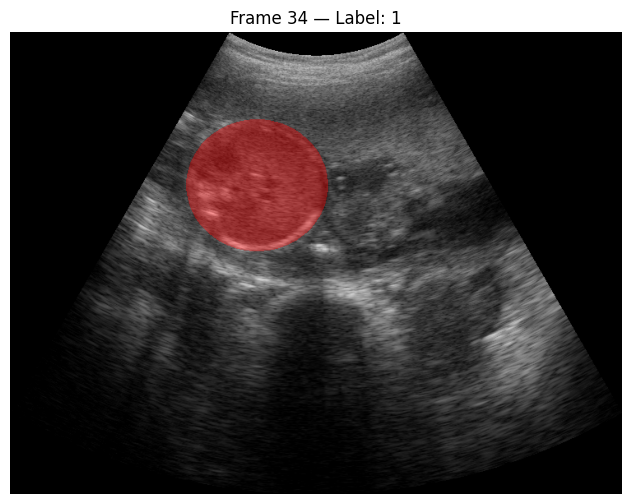

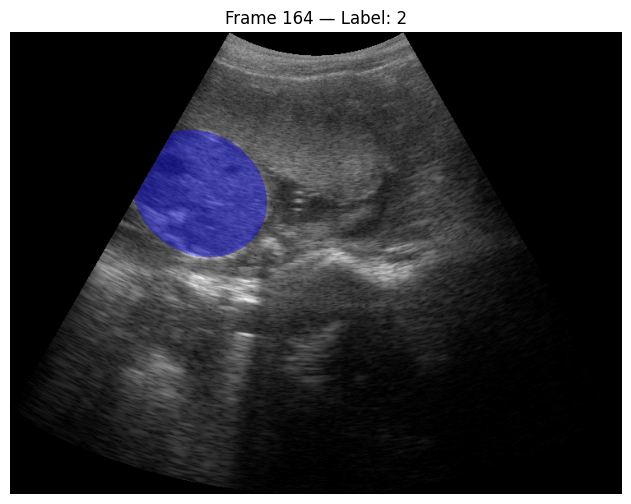

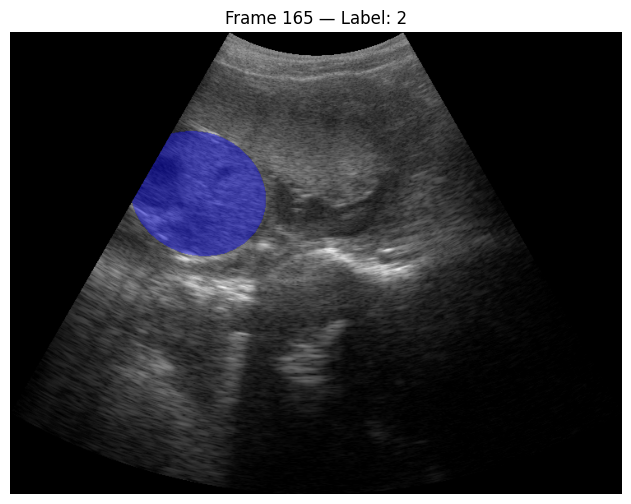

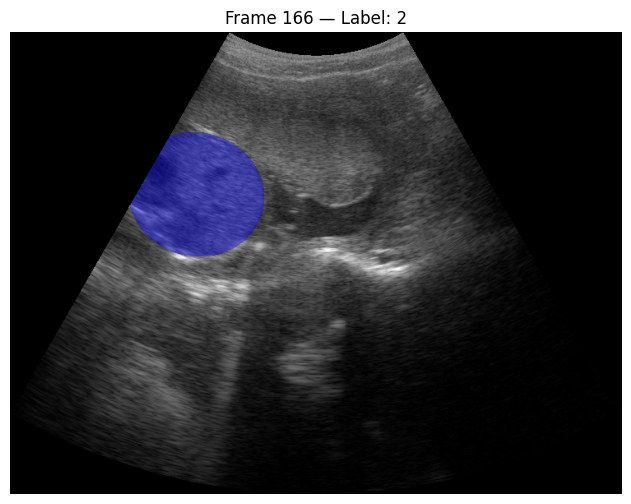

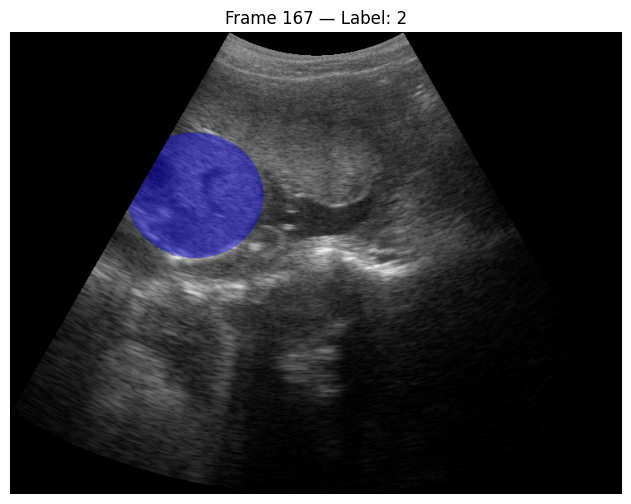

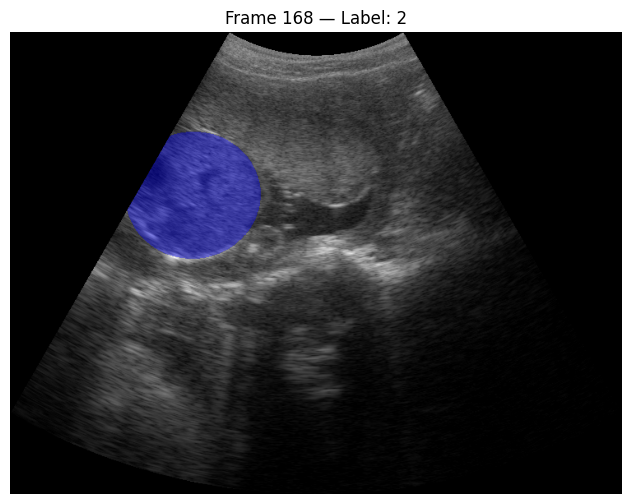

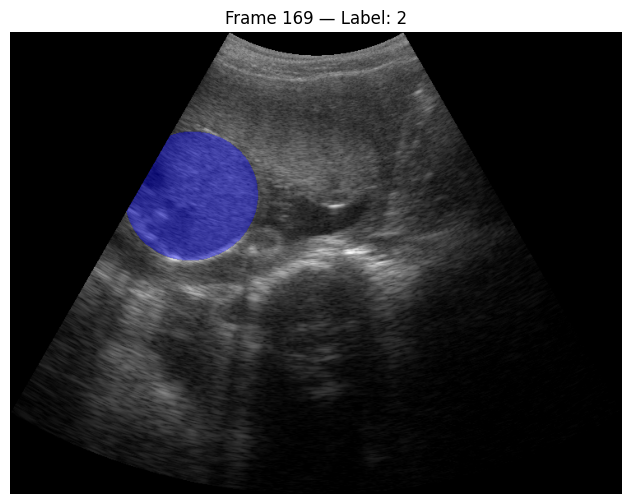

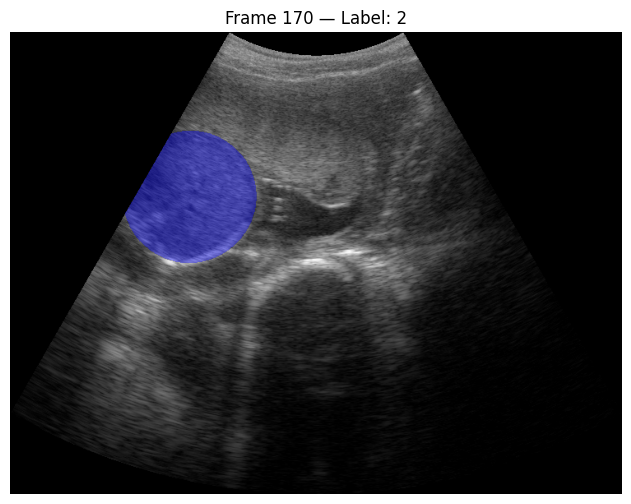

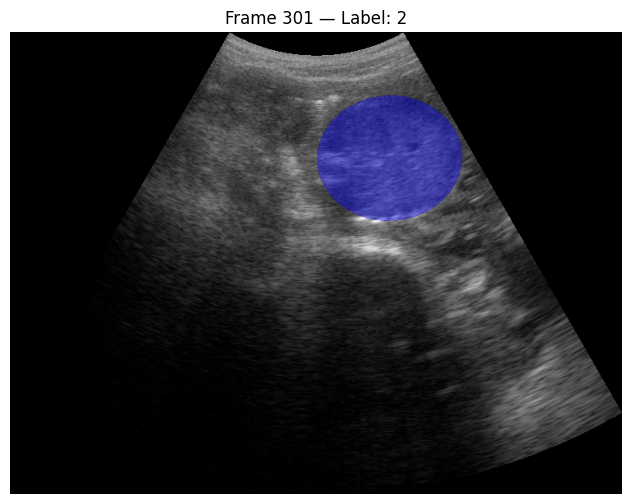

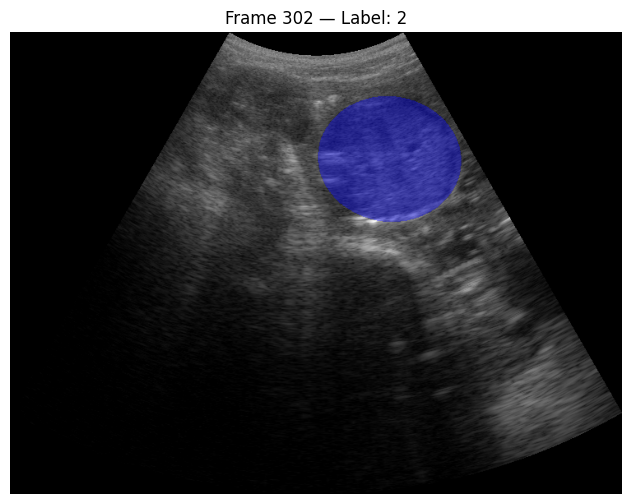

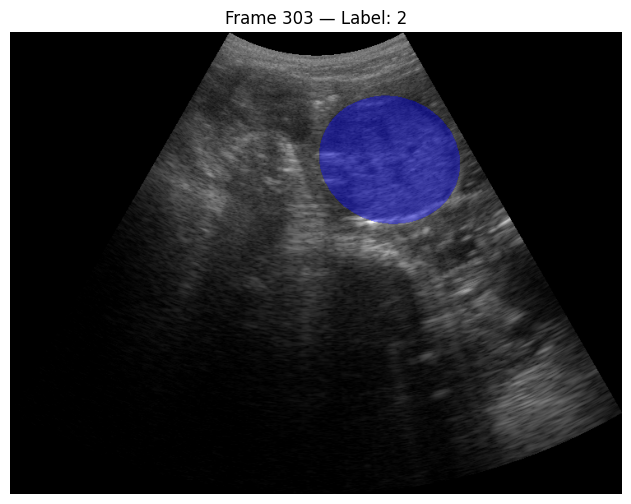

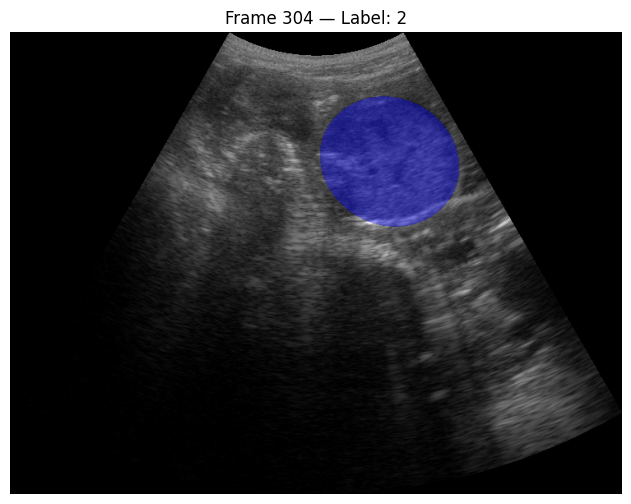

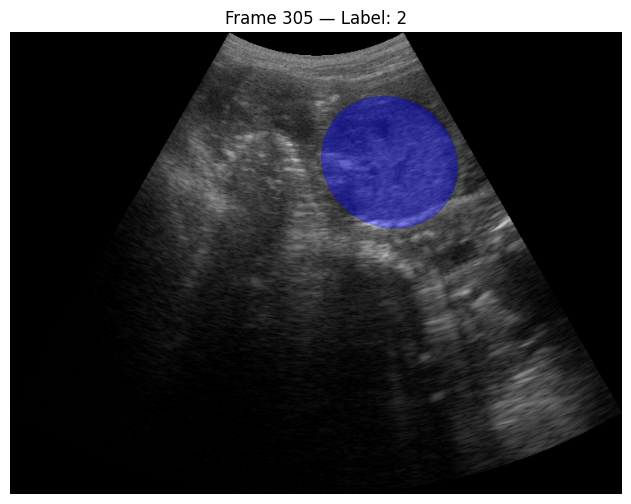

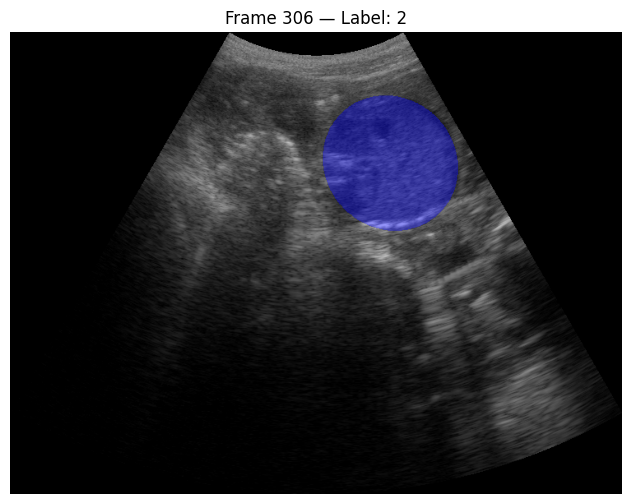

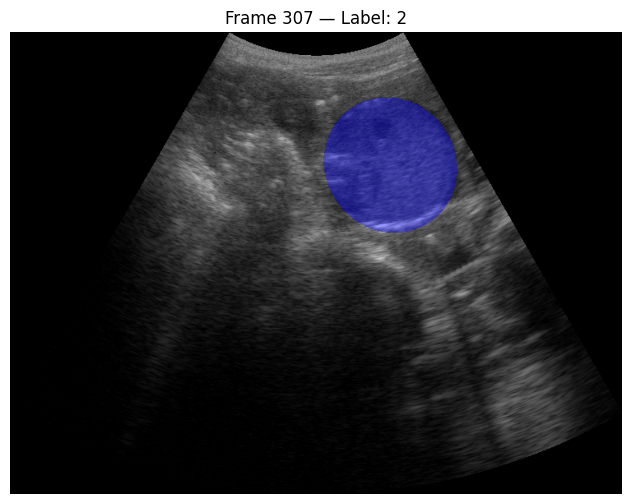

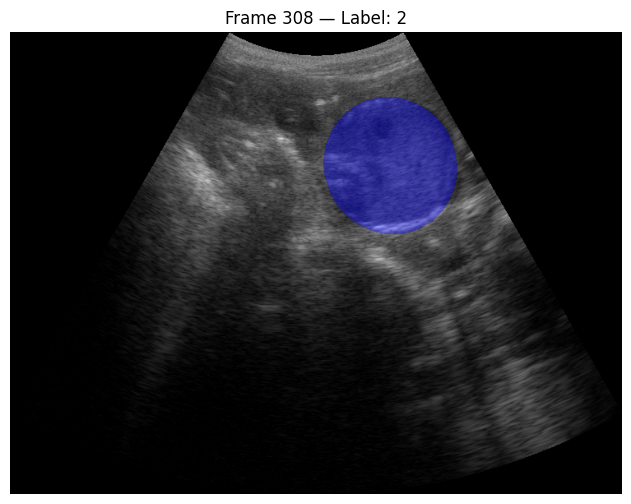

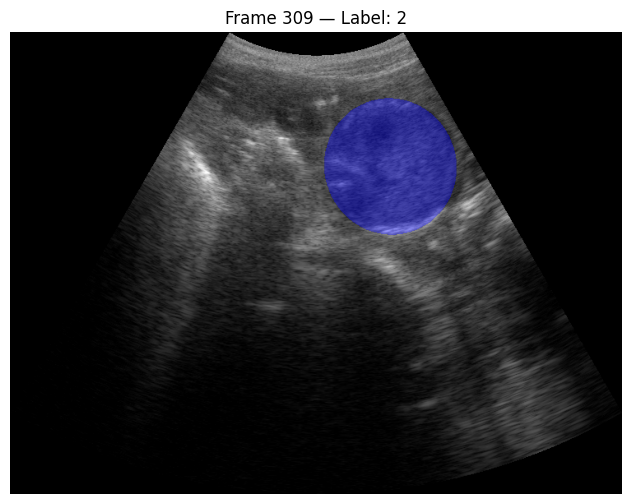

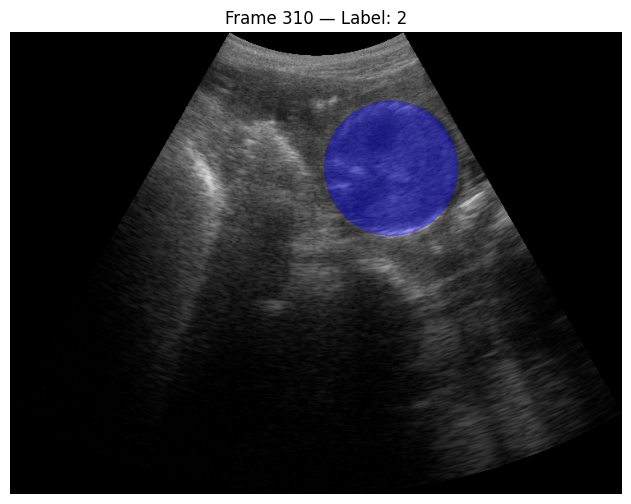

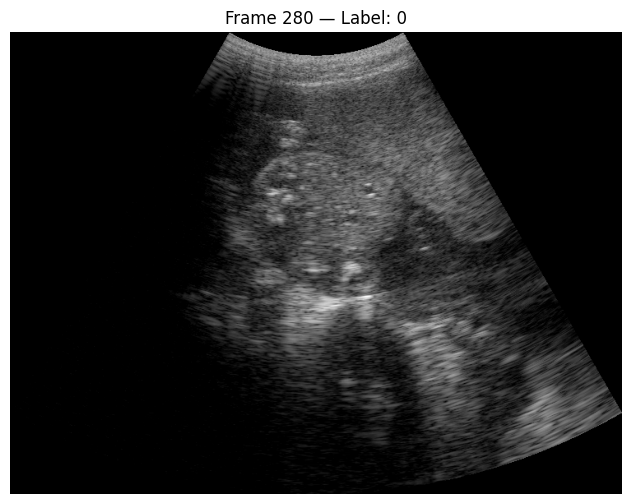

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Inspecting Multiple Cases ---
# This section loads and prints information for a few different files
# to quickly verify their contents.

print("--- Inspecting Case 1 ---")
case1 = np.load("D:/dataset/mult_mha_to_npz/0199616b-bdeb-4119-97a3-a5a3571bd641.npz")
print("Files in npz:", case1.files)
print("Image shape:", case1["image"].shape)
print("Mask shape:", case1["mask"].shape)
print("Label shape:", case1["label"].shape)
print("Pixel spacing:", case1["pixel_spacing"])
print("Ground-truth AC (mm):", case1["ac_reference"])
print("-" * 20)

print("--- Inspecting Case 2 ---")
case2 = np.load("D:/dataset/mult_mha_to_npz/02d3a9bc-63e2-4deb-9dc1-dba17e7d54c1.npz")
print("Files in npz:", case2.files)
print("Image shape:", case2["image"].shape)
print("Mask shape:", case2["mask"].shape)
print("Label shape:", case2["label"].shape)
print("Pixel spacing:", case2["pixel_spacing"])
print("Ground-truth AC (mm):", case2["ac_reference"])
print("-" * 20)


# --- 2. Full Analysis of a Single Case ---
# This section focuses on a specific file for detailed analysis and visualization.

case = np.load("D:/dataset/mult_mha_to_npz/f5a702f0-d759-4b53-8215-462e8145e638.npz")

images = case["image"]  # The video frames (e.g., [T, H, W] or [T, 1, H, W])
masks = case["mask"]    # The segmentation masks
labels = case["label"]  # The frame-level quality labels (0=none, 1=optimal, 2=suboptimal)



# --- 3. Print a Summary of Frames ---
print(f"Frames with any annotation: {(labels > 0).sum()} / {len(labels)}")
print(f"Optimal frames: {(labels == 1).sum()}")
print(f"Suboptimal frames: {(labels == 2).sum()}")
print(f"Unique masks {np.unique(masks)}")

# --- 4. Plot the Classification Labels Timeline ---
# This visualizes the label for each frame in the sequence.
plt.figure(figsize=(15, 2))
plt.title("Frame classification labels (0=background, 1=optimal, 2=suboptimal)")
plt.step(range(len(labels)), labels, where='mid')
plt.xlabel("Frame number")
plt.ylabel("Label")
plt.yticks([0, 1, 2], ['Background', 'Optimal', 'Suboptimal'])
plt.show()


# --- 5. Define a Visualization Function ---
# This function displays a single frame with its segmentation mask.
def show_frame_with_mask(frame_idx):
    """
    Displays a single video frame with its corresponding segmentation mask overlaid.
    """
    img = images[frame_idx]
    if img.ndim == 3:
        img = img[0]  # Remove channel dimension if present (e.g., from [1, H, W] to [H, W])

    mask = masks[frame_idx]
    if mask.ndim == 3:
        mask = mask[0]

    plt.figure(figsize=(8, 6))
    plt.title(f"Frame {frame_idx} — Label: {labels[frame_idx]}")
    plt.imshow(img, cmap='gray')

    # Create an RGBA overlay for the mask
    mask_overlay = np.zeros((*mask.shape, 4))
    
    # Red overlay for optimal frames (label 1)
    mask_overlay[mask == 1] = [1, 0, 0, 0.4]
    
    # Blue overlay for suboptimal frames (label 2)
    mask_overlay[mask == 2] = [0, 0, 1, 0.4]

    plt.imshow(mask_overlay)
    plt.axis("off")
    plt.show()


# --- 6. Visualize Annotated Frames ---
# This section finds all frames with a label of 1 or 2 and visualizes the first 20.
annotated_frames = np.where((labels == 1) | (labels == 2))[0]
print(f"Visualizing the first 20 annotated frames out of {len(annotated_frames)}...")

for idx in annotated_frames[:]:
    show_frame_with_mask(idx)
show_frame_with_mask(280)

In [8]:
! pip install torch

   ---------------------------------------- 0.0/241.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/241.4 MB ? eta -:--:--
   ---------------------------------------- 0.5/241.4 MB 2.1 MB/s eta 0:01:55
   ---------------------------------------- 1.0/241.4 MB 2.2 MB/s eta 0:01:51
   ---------------------------------------- 1.6/241.4 MB 2.3 MB/s eta 0:01:43
   ---------------------------------------- 2.4/241.4 MB 2.6 MB/s eta 0:01:31
    --------------------------------------- 3.4/241.4 MB 3.0 MB/s eta 0:01:19
    --------------------------------------- 4.5/241.4 MB 3.4 MB/s eta 0:01:10
    --------------------------------------- 5.8/241.4 MB 3.8 MB/s eta 0:01:02
   - -------------------------------------- 7.3/241.4 MB 4.3 MB/s eta 0:00:55
   - -------------------------------------- 8.9/241.4 MB 4.7 MB/s eta 0:00:50
   - -------------------------------------- 11.3/241.4 MB 5.4 MB/s eta 0:00:43
   -- ------------------------------------- 13.6/241.4 MB 6.0 MB/s eta 0:00:3

In [4]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. You can use your GPU.")
    print(f"Number of CUDA devices: {torch.cuda.device_count()}")
    print(f"Current CUDA device name: {torch.cuda.get_device_name(0)}") # Prints name of the first GPU
else:
    print("CUDA is not available. PyTorch will use the CPU.")

CUDA is available. You can use your GPU.
Number of CUDA devices: 1
Current CUDA device name: NVIDIA GeForce RTX 5060 Ti


In [2]:
! pip install tqdm

Indexed frames → total: 201600 | per-class: {0: 196234, 1: 1733, 2: 3633}


Indexed frames → total: 50400 | per-class: {0: 49146, 1: 408, 2: 846}


Valid epoch 3: 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]


In [6]:
def check_cache_balance(ds, name="cache"):
    counts = {c: len(ix) for c, ix in ds.by_class.items()}
    total = sum(counts.values()); per = total // 3
    print(f"[{name}] counts:", counts, "| expected each:", per)
    assert all(v == per for v in counts.values()), f"{name} not perfectly balanced"

check_cache_balance(train_ds, "train-cache")
check_cache_balance(val_ds, "val-cache")


[train-cache] counts: {0: 1666, 1: 1666, 2: 1666} | expected each: 1666
[val-cache] counts: {0: 666, 1: 666, 2: 666} | expected each: 666


C:\Users\User\AppData\Local\Temp\ipykernel_22508\530651851.py:237: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=use_amp)
Train 1:   0%|          | 0/52 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_22508\530651851.py:141: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=use_amp):
Train 1:   0%|          | 0/52 [01:29<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 308.00 MiB. GPU 0 has a total capacity of 15.93 GiB of which 0 bytes is free. Of the allocated memory 14.42 GiB is allocated by PyTorch, and 266.72 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Frames with any annotation: 5 / 840
Optimal frames: 0
Suboptimal frames: 5
Unique masks [0 2]


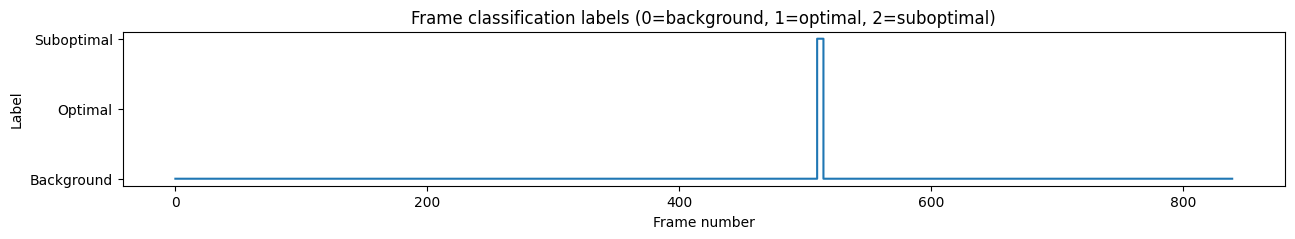

Visualizing the first 20 annotated frames out of 5...


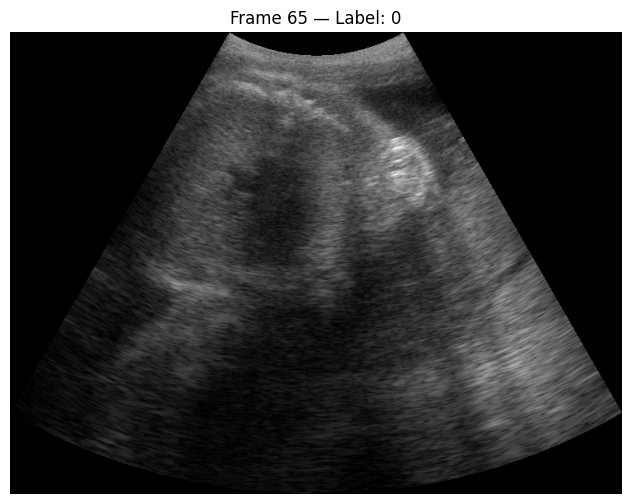

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# --- 2. Full Analysis of a Single Case ---
# This section focuses on a specific file for detailed analysis and visualization.

case = np.load("D:/dataset/mult_mha_to_npz/f4488c3c-556e-43bd-95f9-ae4cbb7c7093.npz")

images = case["image"]  # The video frames (e.g., [T, H, W] or [T, 1, H, W])
masks = case["mask"]    # The segmentation masks
labels = case["label"]  # The frame-level quality labels (0=none, 1=optimal, 2=suboptimal)



# --- 3. Print a Summary of Frames ---
print(f"Frames with any annotation: {(labels > 0).sum()} / {len(labels)}")
print(f"Optimal frames: {(labels == 1).sum()}")
print(f"Suboptimal frames: {(labels == 2).sum()}")
print(f"Unique masks {np.unique(masks)}")

# --- 4. Plot the Classification Labels Timeline ---
# This visualizes the label for each frame in the sequence.
plt.figure(figsize=(15, 2))
plt.title("Frame classification labels (0=background, 1=optimal, 2=suboptimal)")
plt.step(range(len(labels)), labels, where='mid')
plt.xlabel("Frame number")
plt.ylabel("Label")
plt.yticks([0, 1, 2], ['Background', 'Optimal', 'Suboptimal'])
plt.show()


# --- 5. Define a Visualization Function ---
# This function displays a single frame with its segmentation mask.
def show_frame_with_mask(frame_idx):
    """
    Displays a single video frame with its corresponding segmentation mask overlaid.
    """
    img = images[frame_idx]
    if img.ndim == 3:
        img = img[0]  # Remove channel dimension if present (e.g., from [1, H, W] to [H, W])

    mask = masks[frame_idx]
    if mask.ndim == 3:
        mask = mask[0]

    plt.figure(figsize=(8, 6))
    plt.title(f"Frame {frame_idx} — Label: {labels[frame_idx]}")
    plt.imshow(img, cmap='gray')

    # Create an RGBA overlay for the mask
    mask_overlay = np.zeros((*mask.shape, 4))
    
    # Red overlay for optimal frames (label 1)
    mask_overlay[mask == 1] = [1, 0, 0, 0.4]
    
    # Blue overlay for suboptimal frames (label 2)
    mask_overlay[mask == 2] = [0, 0, 1, 0.4]

    plt.imshow(mask_overlay)
    plt.axis("off")
    plt.show()


# --- 6. Visualize Annotated Frames ---
# This section finds all frames with a label of 1 or 2 and visualizes the first 20.
annotated_frames = np.where((labels == 1) | (labels == 2))[0]
print(f"Visualizing the first 20 annotated frames out of {len(annotated_frames)}...")

# for idx in range(80):
#     show_frame_with_mask(idx)
show_frame_with_mask(65)